In [ ]:
# Author: Vanshika Gupta
# Jointly with: Prof Chrysafis Vogiatzis 

### Problem: Exploring a Grid

(a) Devise a polynomial time algorithm to pass through the maximum number of marked points.

In [1]:
# Setting up the environment
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
# Design the network
num_nodes=25
G=nx.DiGraph()
G.add_nodes_from(range(1,num_nodes+1))

# Weight 2 is given to normal edges, weight 1 is given to all edges incoming to a marked node
G.add_weighted_edges_from([(1,2,2),(1,3,2),(2,4,1),(2,5,1),(3,5,1),(3,6,1),(4,7,2),(4,8,2),(5,8,2),(5,9,2)])
G.add_weighted_edges_from([(6,9,2),(6,10,2),(7,11,2),(7,12,2),(8,12,2),(8,13,2),(9,13,2),(9,14,1),(10,14,1),(10,15,2)])
G.add_weighted_edges_from([(11,16,2),(12,16,2),(12,17,2),(13,17,2),(13,18,2),(14,18,2),(14,19,2),(15,19,2)])
G.add_weighted_edges_from([(16,20,1),(17,20,1),(17,21,2),(18,21,2),(18,22,2),(19,22,2),(20,23,2),(21,23,2)])
G.add_weighted_edges_from([(21,24,1),(22,24,1),(23,25,2),(24,25,2)])
# print("Node: \n", G.nodes()) 
# print("Edges: \n", G.edges(data=True))

Please refer to ./Graph.png for reference if image not displayed
./graph.png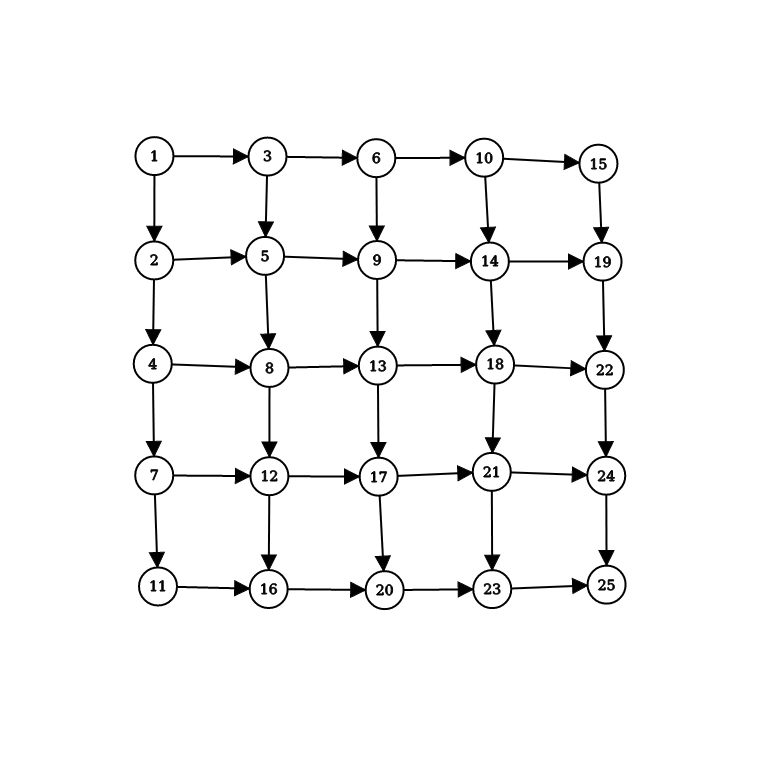

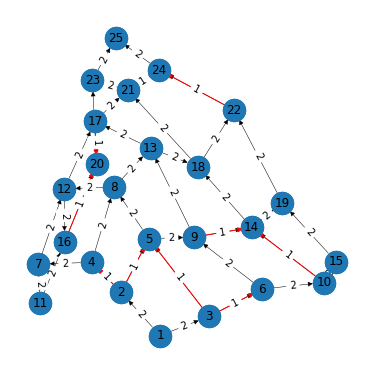

In [3]:
# Draw the Graph
pos=nx.spring_layout(G, iterations=100, seed=39775)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos, node_size=500, width=0.5, with_labels=True)
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
nx.draw_networkx_edges(G,pos, edgelist = [(i,j) for (i,j,w) in G.edges(data=True) if w['weight']<2], edge_color='r')
nx.draw_networkx_nodes(G,pos, nodelist=[i for (i,d) in G.nodes(data=True)], node_size=500) 

In [4]:
# Find shortest path from s-(1) to t-(25) === Find path convering maximum marked nodes
sp = nx.dijkstra_path(G,1,25, weight='weight')
print("Dijkstra's Shortest Path: ", sp) 

Dijkstra's Shortest Path:  [1, 2, 5, 9, 14, 18, 21, 24, 25]


In [5]:
# Verification that it does indeed find all paths
print(list(nx.all_shortest_paths(G,1,25, weight='weight')) )

[[1, 2, 5, 9, 14, 18, 21, 24, 25], [1, 3, 5, 9, 14, 18, 21, 24, 25], [1, 3, 6, 9, 14, 18, 21, 24, 25], [1, 3, 6, 10, 14, 18, 21, 24, 25], [1, 2, 5, 9, 14, 18, 22, 24, 25], [1, 3, 5, 9, 14, 18, 22, 24, 25], [1, 3, 6, 9, 14, 18, 22, 24, 25], [1, 3, 6, 10, 14, 18, 22, 24, 25], [1, 2, 5, 9, 14, 19, 22, 24, 25], [1, 3, 5, 9, 14, 19, 22, 24, 25], [1, 3, 6, 9, 14, 19, 22, 24, 25], [1, 3, 6, 10, 14, 19, 22, 24, 25]]


## ------------------------------
### Just for preview
## -------------------------------

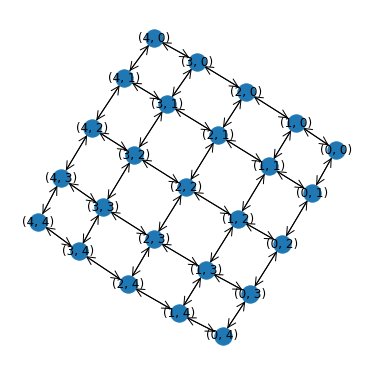

In [6]:
# Just for preview
G1 = nx.grid_2d_graph(5,5, create_using=nx.DiGraph())
nx.draw(G1, with_labels=True, arrowstyle='->', arrowsize=20)